In [2]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline

In [3]:
#Generating Random Data
#We will be generating a set of data using the make_blobs class. 

#Input these parameters into make_blobs:
#n_samples: The total number of points equally divided among clusters.
#Choose a number from 10-1500
#centers: The number of centers to generate, or the fixed center locations.
#Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]])
#cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters
#Choose a number between 0.5-1.5

X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

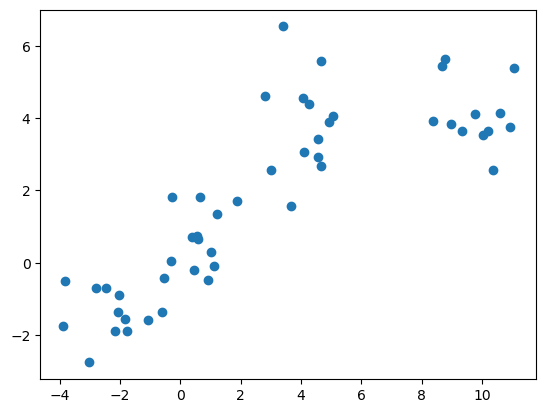

In [4]:
#plot scattered data
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [5]:
#The Agglomerative Clustering class will require two inputs:

#n_clusters: The number of clusters to form as well as the number of centroids to generate.
#Value will be: 4
#linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
#Value will be: 'complete'
#Note: It is recommended you try everything with 'average' as well

#Save the result to agglom
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [6]:
#Fit the model with X2 and y2 from the generated data above.

agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

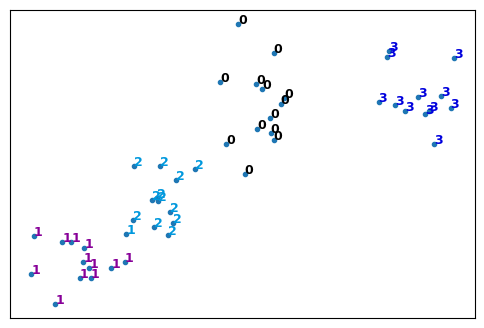

In [7]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [8]:
#Dendrogram Associated for the Agglomerative Hierarchical Clustering
#Remember that a distance matrix contains the distance from each point to every other point of a dataset .

#Use the function distance_matrix, which requires two inputs. Use the Feature Matrix, X1 as both inputs and save the distance matrix to a variable called dist_matrix 

#Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. 
#(print out dist_matrix to make sure it's correct)
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.68197637 0.97943884 ... 0.8392671  0.77239439 0.77278791]
 [0.68197637 0.         0.35119643 ... 0.21751076 0.1634185  0.12034542]
 [0.97943884 0.35119643 0.         ... 0.14279037 0.21010726 0.23153593]
 ...
 [0.8392671  0.21751076 0.14279037 ... 0.         0.06746448 0.09837737]
 [0.77239439 0.1634185  0.21010726 ... 0.06746448 0.         0.06102055]
 [0.77278791 0.12034542 0.23153593 ... 0.09837737 0.06102055 0.        ]]


In [9]:
#Using the linkage class from hierarchy, pass in the parameters:
#The distance matrix 'complete' for complete linkage
Z = hierarchy.linkage(dist_matrix, 'complete')

/var/folders/0w/n0wcx9c51v37zxn7w2bsvrpr0000gn/T/ipykernel_45970/1643419971.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


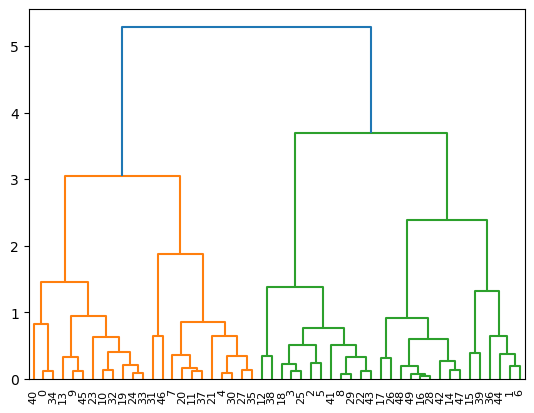

In [10]:
#Save the dendrogram to a variable called dendro. In doing this, the dendrogram will also be displayed. 
#Using the dendrogram class from hierarchy, pass in the parameter:

dendro = hierarchy.dendrogram(Z)

In [11]:
Y = hierarchy.linkage(dist_matrix, 'average')

/var/folders/0w/n0wcx9c51v37zxn7w2bsvrpr0000gn/T/ipykernel_45970/3075026309.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')


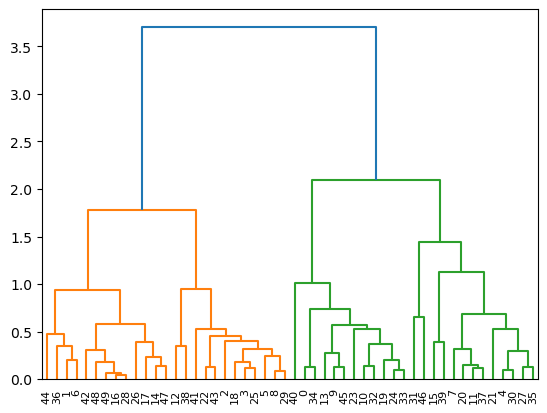

In [12]:

dendro2 = hierarchy.dendrogram(Y)